In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
%matplotlib inline
import os
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [110]:
df=pd.read_csv("Dataset.csv",low_memory=False)

In [111]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1111623,0,8.0,0,2,3,5,0,3,3,...,0,0.68,0.58,0,No,No,Yes,Yes,No,Yes
1,1111652,24,8.0,0,3456,3456,3456,10,39,68,...,0,1.00,0.95,1,No,No,Yes,Yes,No,Yes
2,1111655,-55,8.0,2,428,526,606,25,100,205,...,0,-99.00,-99.00,56,No,No,No,Yes,No,Yes
3,1111659,30,8.0,14,42,84,126,7,56,107,...,0,0.98,0.92,0,No,No,No,Yes,No,Yes
4,1111670,-499,12.0,350,3452,5044,7188,747,2550,3572,...,0,0.49,0.72,525,No,No,No,Yes,No,Yes


In [223]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [226]:
df_limited = df[[ 'forecast_6_month', 'forecast_9_month', 'sales_6_month', 'sales_9_month', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']]
df_limited.head()

,forecast_6_month,forecast_9_month,sales_6_month,sales_9_month,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3,5,3,3,0,0,1,1,0,1
1,3456,3456,68,93,0,0,1,1,0,1
2,526,606,205,387,0,0,0,1,0,1
3,84,126,107,148,0,0,0,1,0,1
4,5044,7188,3572,4745,0,0,0,1,0,1


In [227]:
df_limited.isna().sum()

forecast_6_month     0
forecast_9_month     0
sales_6_month        0
sales_9_month        0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [112]:
df.shape

(118767, 23)

In [5]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.187670e+05,1.187670e+05,110627.000000,118767.000000,1.187670e+05,1.187670e+05,1.187670e+05,118767.000000,1.187670e+05,1.187670e+05,1.187670e+05,118767.000000,118767.000000,118767.000000,118767.000000,118767.000000
mean,1.911054e+06,3.869577e+02,7.645096,52.164229,2.599210e+02,4.855791e+02,7.070231e+02,72.955771,2.283675e+02,4.377663e+02,6.680558e+02,63.028720,13.604276,-7.794247,-7.338927,1.163337
std,6.314430e+05,8.157252e+03,6.667494,1101.448088,6.105767e+03,1.198742e+04,1.790256e+04,2657.882984,6.016469e+03,1.078787e+04,1.619344e+04,1187.425934,652.593739,27.937519,27.244237,36.995913
min,1.111623e+06,-4.573000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.379804e+06,3.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.580000,0.600000,0.000000
50%,1.476125e+06,1.300000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000e+00,3.000000e+00,5.000000e+00,0.000000,0.000000,0.790000,0.780000,0.000000
75%,2.305438e+06,7.300000e+01,8.000000,0.000000,1.200000e+01,2.700000e+01,4.100000e+01,6.000000,2.100000e+01,4.100000e+01,6.300000e+01,5.000000,0.000000,0.950000,0.940000,0.000000
max,3.284914e+06,1.303177e+06,52.000000,175488.000000,1.218328e+06,2.461360e+06,3.777304e+06,741762.000000,1.070623e+06,2.146625e+06,3.197338e+06,204803.000000,137625.000000,1.000000,1.000000,4091.000000


In [6]:
df.shape

(118767, 23)

In [7]:
df.isna().sum()

sku                     0
national_inv            0
lead_time            8140
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [8]:
df.isnull()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118764,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

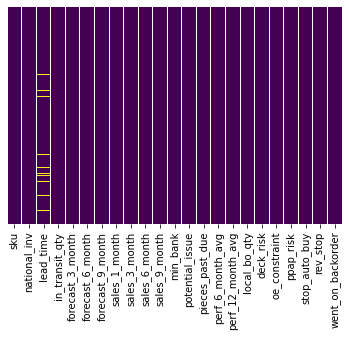

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.dropna(axis=0, inplace=True)
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1111623,0,8.0,0,2,3,5,0,3,3,...,0,0.68,0.58,0,No,No,Yes,Yes,No,Yes
1,1111652,24,8.0,0,3456,3456,3456,10,39,68,...,0,1.00,0.95,1,No,No,Yes,Yes,No,Yes
2,1111655,-55,8.0,2,428,526,606,25,100,205,...,0,-99.00,-99.00,56,No,No,No,Yes,No,Yes
3,1111659,30,8.0,14,42,84,126,7,56,107,...,0,0.98,0.92,0,No,No,No,Yes,No,Yes
4,1111670,-499,12.0,350,3452,5044,7188,747,2550,3572,...,0,0.49,0.72,525,No,No,No,Yes,No,Yes


<AxesSubplot:>

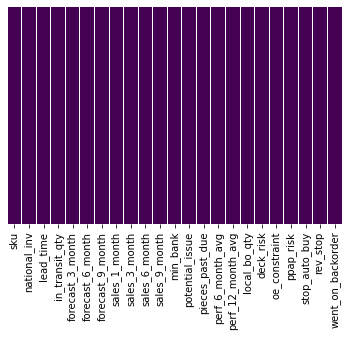

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# df.profile_report()

In [218]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

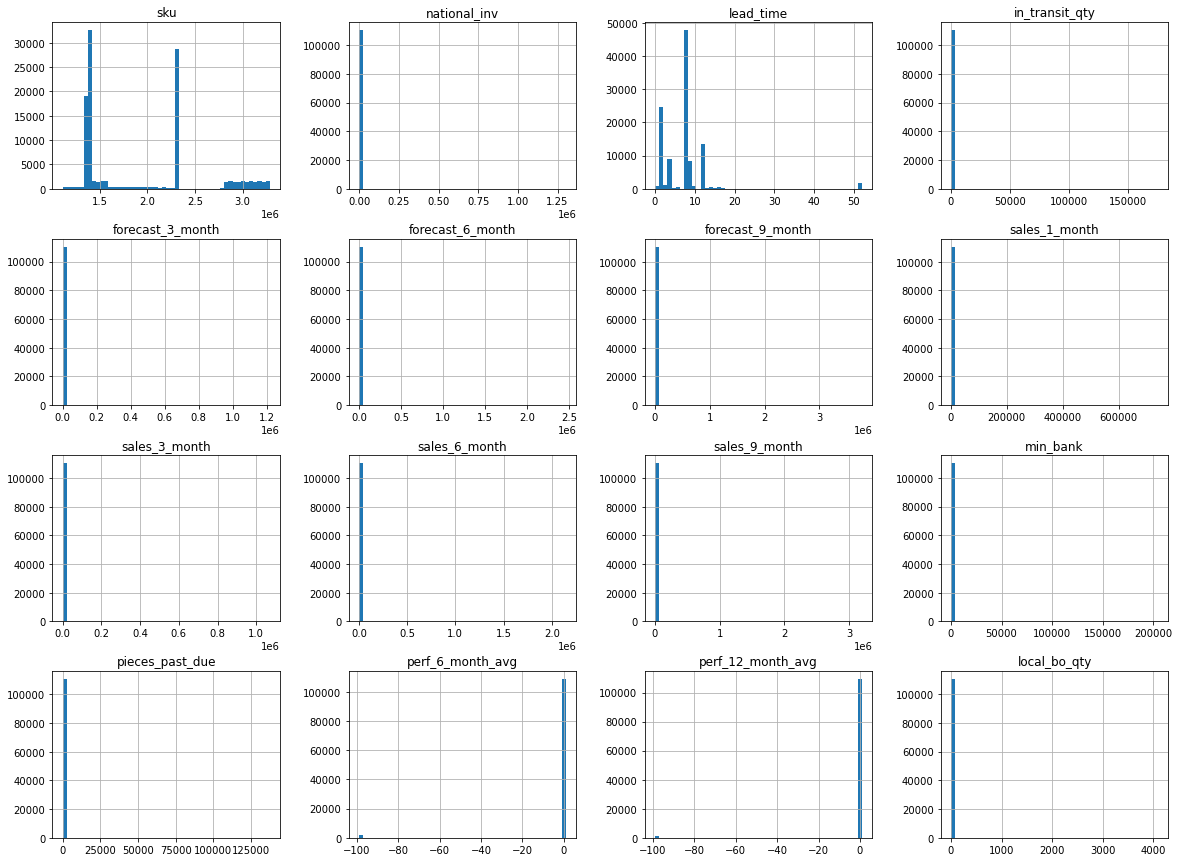

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
new_df = df.drop(['sku'], axis=1)
print(new_df.head())

   national_inv  lead_time  in_transit_qty  forecast_3_month  \
0             0        8.0               0                 2   
1            24        8.0               0              3456   
2           -55        8.0               2               428   
3            30        8.0              14                42   
4          -499       12.0             350              3452   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0                 3                 5              0              3   
1              3456              3456             10             39   
2               526               606             25            100   
3                84               126              7             56   
4              5044              7188            747           2550   

   sales_6_month  sales_9_month  ...  pieces_past_due perf_6_month_avg  \
0              3              3  ...                0             0.68   
1             68             93  ...    

In [37]:
print(new_df.went_on_backorder.value_counts()['Yes'])
print(new_df.went_on_backorder.value_counts()['No'])

8648
101979


In [38]:
# new_df_dummies = pd.get_dummies(new_df[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']])
# print(new_df_dummies.head())

In [19]:
latest_new_df = new_df.drop(['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop'],axis=1)

In [20]:
new_df_with_dummies = pd.concat((latest_new_df,new_df_dummies),axis=1)
new_df_with_dummies.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
0,0,8.0,0,2,3,5,0,3,3,3,...,1,0,1,0,0,1,0,1,1,0
1,24,8.0,0,3456,3456,3456,10,39,68,93,...,1,0,1,0,0,1,0,1,1,0
2,-55,8.0,2,428,526,606,25,100,205,387,...,1,0,1,0,1,0,0,1,1,0
3,30,8.0,14,42,84,126,7,56,107,148,...,1,0,1,0,1,0,0,1,1,0
4,-499,12.0,350,3452,5044,7188,747,2550,3572,4745,...,1,0,1,0,1,0,0,1,1,0


In [113]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1111623,0,8.0,0,2,3,5,0,3,3,...,0,0.68,0.58,0,No,No,Yes,Yes,No,Yes
1,1111652,24,8.0,0,3456,3456,3456,10,39,68,...,0,1.00,0.95,1,No,No,Yes,Yes,No,Yes
2,1111655,-55,8.0,2,428,526,606,25,100,205,...,0,-99.00,-99.00,56,No,No,No,Yes,No,Yes
3,1111659,30,8.0,14,42,84,126,7,56,107,...,0,0.98,0.92,0,No,No,No,Yes,No,Yes
4,1111670,-499,12.0,350,3452,5044,7188,747,2550,3572,...,0,0.49,0.72,525,No,No,No,Yes,No,Yes


In [114]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [115]:
df[['deck_risk', 'oe_constraint','potential_issue',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']] = df[['deck_risk', 'potential_issue','oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']].astype('category')

In [116]:
df.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [117]:
df['deck_risk'] = df['deck_risk'].cat.codes

In [118]:
df['oe_constraint'] = df['oe_constraint'].cat.codes

In [119]:
df['ppap_risk'] = df['ppap_risk'].cat.codes

In [120]:
df['stop_auto_buy'] = df['stop_auto_buy'].cat.codes

In [121]:
df['rev_stop'] = df['rev_stop'].cat.codes

In [122]:
df['went_on_backorder'] = df['went_on_backorder'].cat.codes

In [123]:
df['potential_issue'] = df['potential_issue'].cat.codes

In [124]:
df.head().T

,0,1,2,3,4
sku,1111623.00,1111652.00,1111655.0,1111659.00,1111670.00
national_inv,0.00,24.00,-55.0,30.00,-499.00
lead_time,8.00,8.00,8.0,8.00,12.00
in_transit_qty,0.00,0.00,2.0,14.00,350.00
forecast_3_month,2.00,3456.00,428.0,42.00,3452.00
forecast_6_month,3.00,3456.00,526.0,84.00,5044.00
forecast_9_month,5.00,3456.00,606.0,126.00,7188.00
sales_1_month,0.00,10.00,25.0,7.00,747.00
sales_3_month,3.00,39.00,100.0,56.00,2550.00
sales_6_month,3.00,68.00,205.0,107.00,3572.00


In [135]:
df.shape

(118767, 23)

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [164]:
data = df.iloc[:, :22]
data.head().T

,0,1,2,3,4
sku,1111623.00,1111652.00,1111655.0,1111659.00,1111670.00
national_inv,0.00,24.00,-55.0,30.00,-499.00
lead_time,8.00,8.00,8.0,8.00,12.00
in_transit_qty,0.00,0.00,2.0,14.00,350.00
forecast_3_month,2.00,3456.00,428.0,42.00,3452.00
forecast_6_month,3.00,3456.00,526.0,84.00,5044.00
forecast_9_month,5.00,3456.00,606.0,126.00,7188.00
sales_1_month,0.00,10.00,25.0,7.00,747.00
sales_3_month,3.00,39.00,100.0,56.00,2550.00
sales_6_month,3.00,68.00,205.0,107.00,3572.00


In [165]:
df_scaled = scaler.fit_transform(data)

In [168]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.266044,-0.047437,0.053229,-0.047360,-0.042242,-0.040257,-0.039214,-0.027449,-0.037459,-0.040302,...,-0.016417,-0.020847,0.303330,0.290666,-0.031445,-0.548674,-0.034962,2.640456,0.195426,-0.021328
1,-1.265998,-0.044495,0.053229,-0.047360,0.523455,0.247796,0.153553,-0.023687,-0.031475,-0.034276,...,-0.016417,-0.020847,0.314784,0.304246,-0.004415,-0.548674,-0.034962,2.640456,0.195426,-0.021328
2,-1.265993,-0.054180,0.053229,-0.045544,0.027528,0.003372,-0.005643,-0.018043,-0.021336,-0.021577,...,-0.016417,-0.020847,-3.264647,-3.364435,1.482242,-0.548674,-0.034962,-0.378722,0.195426,-0.021328
3,-1.265987,-0.043760,0.053229,-0.034649,-0.035691,-0.033500,-0.032455,-0.024815,-0.028649,-0.030661,...,-0.016417,-0.020847,0.314068,0.303145,-0.031445,-0.548674,-0.034962,-0.378722,0.195426,-0.021328
4,-1.265969,-0.108610,0.653158,0.270405,0.522800,0.380269,0.362015,0.253603,0.385881,0.290534,...,-0.016417,-0.020847,0.296529,0.295804,14.159371,-0.548674,-0.034962,-0.378722,0.195426,-0.021328
5,-1.265559,-0.047315,0.053229,-0.045544,-0.038312,-0.037338,-0.036924,-0.024439,-0.035630,-0.038077,...,-0.016417,-0.020847,0.313710,0.303879,-0.031445,-0.548674,-0.034962,-0.378722,0.195426,-0.021328
6,-1.263909,-0.045844,-0.846663,-0.047360,-0.041751,-0.039256,-0.038097,-0.023687,-0.032805,-0.036130,...,-0.016417,-0.020847,0.314426,0.305715,-0.031445,-0.548674,-0.034962,-0.378722,0.195426,-0.021328
7,-1.263885,-0.046825,-0.846663,-0.047360,-0.040441,-0.038339,-0.038041,-0.027073,-0.037126,-0.039653,...,-0.016417,-0.020847,0.281137,0.287729,-0.031445,-0.548674,-0.034962,2.640456,0.195426,-0.021328
8,-1.263872,-0.047437,-0.846663,-0.047360,-0.040113,-0.039256,-0.038655,-0.027449,-0.037957,-0.040580,...,-0.016417,-0.020847,0.282569,0.271212,-0.031445,1.822577,-0.034962,-0.378722,0.195426,-0.021328
9,-1.263773,-0.047928,0.053229,-0.047360,-0.038639,-0.037087,-0.036700,-0.026320,-0.036960,-0.038818,...,-0.016417,-0.019314,0.306551,0.296538,0.076675,-0.548674,-0.034962,-0.378722,0.195426,-0.021328


In [169]:
df_scaled.shape

(118767, 22)

In [170]:
df_scaled.isna().sum()

0        0
1        0
2     8140
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
dtype: int64

In [171]:
df_scaled.dropna(inplace=True)

In [172]:
df_scaled.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [173]:
from sklearn.decomposition import PCA

In [174]:
decomposer = PCA(n_components=5)

In [175]:
decomposer.fit(df_scaled)

PCA(n_components=5)

In [176]:
df_decomposed = decomposer.transform(df_scaled) 
df_decomposed.shape

(110627, 5)

In [177]:
df_decomposed1= pd.DataFrame(df_decomposed)

In [180]:
df_decomposed1.head().T

,0,1,2,3,4
0,-0.143643,0.223225,-0.019622,-0.111315,1.266544
1,-0.307450,-0.305049,-0.263609,0.156849,0.377642
2,0.093901,0.093171,0.286899,-0.229567,4.095177
3,-0.624115,-0.645885,0.813014,0.205386,5.900542
4,2.460626,2.437552,0.135255,0.380701,-0.565249


In [181]:
df_decomposed1.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [182]:
df_decomposed1.head()

,0,1,2,3,4
0,-0.143643,-0.307450,0.093901,-0.624115,2.460626
1,0.223225,-0.305049,0.093171,-0.645885,2.437552
2,-0.019622,-0.263609,0.286899,0.813014,0.135255
3,-0.111315,0.156849,-0.229567,0.205386,0.380701
4,1.266544,0.377642,4.095177,5.900542,-0.565249


In [184]:
df_decomposed1.shape, df.shape

((110627, 5), (118767, 23))

In [192]:
df_final1 = pd.concat([df_decomposed1, df['went_on_backorder']], axis=1)

In [193]:
df_final = df_final1.iloc[:110627, :]

In [194]:
df_final.isna().sum()

0                    0
1                    0
2                    0
3                    0
4                    0
went_on_backorder    0
dtype: int64

In [195]:
df_final.shape

(110627, 6)

In [201]:
df_final.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,went_on_backorder
0,-0.143643,-0.307450,0.093901,-0.624115,2.460626,1
1,0.223225,-0.305049,0.093171,-0.645885,2.437552,1
2,-0.019622,-0.263609,0.286899,0.813014,0.135255,1
3,-0.111315,0.156849,-0.229567,0.205386,0.380701,1
4,1.266544,0.377642,4.095177,5.900542,-0.565249,1


In [199]:
df_final.columns = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'went_on_backorder']

In [189]:
from sklearn.model_selection import train_test_split

In [203]:
x = df_final.iloc[:, :4]
x

,national_inv,lead_time,in_transit_qty,forecast_3_month
0,-0.143643,-0.307450,0.093901,-0.624115
1,0.223225,-0.305049,0.093171,-0.645885
2,-0.019622,-0.263609,0.286899,0.813014
3,-0.111315,0.156849,-0.229567,0.205386
4,1.266544,0.377642,4.095177,5.900542
...,...,...,...,...
110622,-0.152934,-0.178342,-0.117227,0.091179
110623,-0.152934,-0.178342,-0.117227,0.091179
110624,0.013623,-0.176758,-0.115796,0.097786
110625,-0.128216,-1.399850,0.014956,0.207719


In [204]:
y = df_final.iloc[:,-1]
y

0         1
1         1
2         1
3         1
4         1
         ..
110622    0
110623    0
110624    0
110625    0
110626    0
Name: went_on_backorder, Length: 110627, dtype: int8

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [206]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((77438, 4), (33189, 4), (77438,), (33189,))

In [207]:
pipe = Pipeline([
                 ("scale", StandardScaler()),
                 ("model", KNeighborsClassifier(n_neighbors=3))
])

In [208]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 3,
 'model__p': 2,
 'model__weights': 'uniform'}

In [209]:
model = GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},cv=3)

In [211]:
model.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [212]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [213]:
y_predicted = model.predict(x_test)

In [214]:
accuracy_score(y_test, y_predicted)

0.9796619361836754

In [ ]:
#to check the overfitting

In [215]:
y_pred_train = model.predict(x_train)

In [216]:
accuracy_score(y_train, y_pred_train)

0.9842454608848369

In [228]:
df_limited.head()

,forecast_6_month,forecast_9_month,sales_6_month,sales_9_month,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3,5,3,3,0,0,1,1,0,1
1,3456,3456,68,93,0,0,1,1,0,1
2,526,606,205,387,0,0,0,1,0,1
3,84,126,107,148,0,0,0,1,0,1
4,5044,7188,3572,4745,0,0,0,1,0,1


In [231]:
x = df_limited.iloc[:, :8]
x

,forecast_6_month,forecast_9_month,sales_6_month,sales_9_month,deck_risk,oe_constraint,ppap_risk,stop_auto_buy
0,3,5,3,3,0,0,1,1
1,3456,3456,68,93,0,0,1,1
2,526,606,205,387,0,0,0,1
3,84,126,107,148,0,0,0,1
4,5044,7188,3572,4745,0,0,0,1
...,...,...,...,...,...,...,...,...
118762,2,2,0,0,1,0,0,1
118763,504,840,200,200,1,0,0,1
118764,0,0,0,0,0,0,1,1
118765,12,12,0,0,0,0,0,0


In [234]:
y = df_limited.iloc[:, -1]
y

0         1
1         1
2         1
3         1
4         1
         ..
118762    0
118763    0
118764    0
118765    0
118766    0
Name: went_on_backorder, Length: 118767, dtype: int8

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [236]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((83136, 8), (35631, 8), (83136,), (35631,))

In [237]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 3,
 'model__p': 2,
 'model__weights': 'uniform'}

In [238]:
model = GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},cv=3)

In [240]:
model.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [241]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [242]:
y_predicted = model.predict(x_test)

In [243]:
accuracy_score(y_test, y_predicted)

0.9263281973562347

In [244]:
#to check the overfitting

In [245]:
y_pred_train = model.predict(x_train)

In [246]:
accuracy_score(y_train, y_pred_train)

0.9521506928406467

In [249]:
from sklearn.model_selection import cross_val_score

In [253]:
cross_val_score(model, x_train, y_train, cv = 5)

array([0.92530671, 0.92175377, 0.92205449, 0.92385878, 0.92518193])